In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/Spam/Spam/smsspamcollection/SMSSpamCollection', delimiter='\t', names=['Category','Message'])

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB


In [5]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df.shape

(5572, 2)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

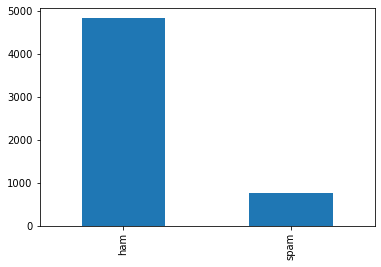

In [8]:
df['Category'].value_counts().plot(kind='bar')

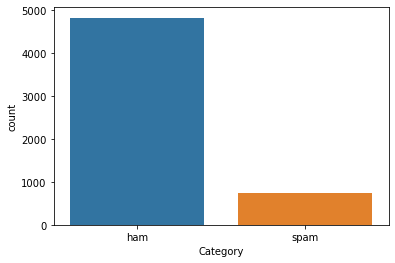

In [10]:
sns.countplot(x='Category', data=df)

In [175]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer  

In [176]:
ps=PorterStemmer()
wnl= WordNetLemmatizer()

In [178]:
corpus=[]
for i in df['Message']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    
    review = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    
    corpus.append(review)


In [221]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3500)
X = cv.fit_transform(corpus).toarray()

MemoryError: Unable to allocate 149. MiB for an array with shape (5572, 3500) and data type int64

In [220]:
import numpy
import sys

In [217]:
numpy.set_printoptions(threshold=sys.maxsize)

In [200]:
a=pd.DataFrame(X)

In [201]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
y=pd.get_dummies(df['Category'])

In [203]:
y=y.iloc[:,1].values

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [206]:
X_train.shape

(4457, 2500)

In [207]:
X_test.shape

(1115, 2500)

In [208]:
from sklearn.naive_bayes import MultinomialNB


In [209]:
spam_detect_model = MultinomialNB().fit(X_train, Y_train)

In [210]:
y_pred=spam_detect_model.predict(X_test)

In [211]:
from sklearn.metrics import confusion_matrix

In [212]:
confusion_matrix(Y_test, y_pred)

array([[946,   9],
       [ 10, 150]], dtype=int64)

In [213]:
from sklearn.metrics import accuracy_score

In [214]:
accuracy_score(Y_test, y_pred)

0.9829596412556054